In [1]:
import networkx as nx
import pandas as pd
%matplotlib inline

In [2]:
train = pd.read_csv("data/train_data.csv").set_index("id").drop("is_duplicate",axis=1)

In [3]:
#train = train.sample(n=5000)

In [4]:
nodes_a = pd.concat([train.question1,train.question2]).unique()

In [5]:
labels = pd.read_csv("data/train_labels.csv").set_index("id")

In [6]:
len(nodes_a)

449442

In [7]:
nodes = pd.DataFrame(nodes_a,columns=["question"])
#nodes.index.name = "q_id"
nodes["q_id"] = nodes.index
nodes.head()

,question,q_id
0,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,1
2,How can I increase the speed of my internet co...,2
3,Why am I mentally very lonely? How can I solve...,3
4,"Which one dissolve in water quikly sugar, salt...",4


In [8]:
train["pair_id"] = train.index

edges = train.merge(nodes, how='inner', left_on="question1", right_on="question")\
        .drop("question",axis=1)\
        .rename(columns={"q_id":"q1_id"})\
        .merge(nodes, how='inner', left_on="question2", right_on="question")\
        .drop("question",axis=1)\
        .rename(columns={"q_id":"q2_id"})\
        .drop(["question1","question2"],axis=1)

In [14]:
edges.head(1)

,pair_id,q1_id,q2_id
0,117816,0,4947


In [9]:
G = nx.from_pandas_edgelist(edges,source='q1_id', target='q2_id')

In [10]:
G.number_of_nodes()

449442


## Get edges

In [11]:
d = G.degree
def get_degree(qid):
    return d[qid]

In [19]:
train_ic = train
train_ic['q1_d'] = edges.apply(lambda row: get_degree(row.q1_id), axis=1)
train_ic['q2_d'] = edges.apply(lambda row: get_degree(row.q2_id), axis=1)

In [20]:
train_ic[train_ic['q1_d'] > 1].shape

(117597, 5)

In [21]:
train_ic[train_ic['q1_d'] > 2].shape

(73134, 5)

## Get Intersection count 

In [15]:
def get_intersection_count(row):
    q1_id = row.q1_id
    q2_id = row.q2_id
    
    intersection_count = len(
                            set(G.neighbors(q1_id))\
                                    .intersection(set(G.neighbors(q2_id)))
                            )
    
    return(intersection_count)

In [16]:
#train_ic = edges
#test_ic = pd.DataFrame()

train_ic['intersection_count'] = edges.apply(lambda row: get_intersection_count(row), axis=1)
train_ic[train_ic['intersection_count'] > 1].shape

(45346, 4)

In [127]:
train_ic.sort_values("intersection_count")

,pair_id,q1_id,q2_id,intersection_count
0,0,0,241804,0
215405,182971,122326,341534,0
215404,182970,122325,341533,0
215403,310445,122324,404663,0
215402,182968,122324,341532,0
215401,182967,122323,341531,0
215400,182966,122322,341530,0
215399,378942,122321,437340,0
215398,182963,122321,341529,0
215397,182961,122319,341528,0


In [11]:
df

,weight,cost
0,4,7
1,7,1
2,10,9


In [12]:
import pandas as pd
pd.options.display.max_columns = 20
import numpy as np
rng = np.random.RandomState(seed=5)
ints = rng.randint(1, 11, size=(3,2))
a = ['A', 'B', 'C']
b = ['D', 'A', 'E']
df = pd.DataFrame(ints, columns=['weight', 'cost'])
df[0] = a
df['b'] = b
df[['weight', 'cost', 0, 'b']]

G = nx.from_pandas_edgelist(df, 0, 'b', ['weight', 'cost'])
G['E']['C']['weight']

G['E']['C']['cost']

edges = pd.DataFrame({'source': [0, 1, 2],
                      'target': [2, 2, 3],
                      'weight': [3, 4, 5],
                      'color': ['red', 'blue', 'blue']})
G = nx.from_pandas_edgelist(edges, edge_attr=True)
G[0][2]['color']

'red'

In [14]:
G.edges

EdgeView([(0, 2), (2, 1), (2, 3)])

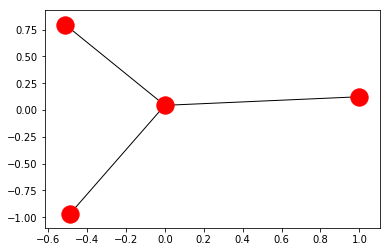

In [16]:
nx.draw_networkx(G, with_labels=False)

In [18]:
g2 = G[2]

In [31]:
G.degree([3])

DegreeView({3: 1})

In [20]:

G.nodes

NodeView((0, 2, 1, 3))